# FAIRe Qualitäts-KPIs
Autor:  Christoph Fröhlich
Datum: 26.10.2023

## Forschungsfrage
Formulieren Sie eine oder mehrere Forschungsfragen zu der Lerneinheit:

Inwiefern kann die Funktion des Autos beim Ziel der Maximierung verschiedener KPIs beibehalten werden?

## Erstes Fahrzeug


### Versuchsziel
Formulieren Sie ein Versuchsziel für diesen ersten Versuch:

Angemessene KPIs erreichen bei moderatem Fahrzeugaufwand

### Versuchsaufbau

Bauen Sie ein erstes Fahrzeug aus den gegebenen LEGO-Teilen in der CAD-Software LeoCAD auf.

Hierbei gelten die folgenden Rahmenbedingungen:
- Das Fahrzeug muss aus Baugruppen, Bauteilen und Komponenten bestehen.
- Es muss mindestens vier Räder besitzen
- Es muss sich durch den elektrischen Antrieb fortbewegen können. 
- Die Verwendung eines Getriebes zwischen Motor und Antriebsachse(n) ist verpflichtend. 
- Die Farbe von mindestens einem Teil soll sich von der in LeoCAD hinterlegten Standardfarbe unterscheiden.
- Es sind nur die LEGO-Teile zu verwenden, welche sich in den JSON-Dateien bzw. in
der zur Verfügung gestellten Teilebibliothek befinden.

Fügen Sie eine Abbildung des fertigen Autos in LeoCAD hinzu (*Hinweise: Ein Bild lässt sich mit \!\[Bildbeschreibung](/Pfad/zum/Bild) hinzufügen. Achten Sie darauf, das Bild später auch in Git hinzuzufügen*):


![Screenshot CAD Auto 1](figures/Auto_1.png)

Beschreiben Sie kurz und präzise Ihr Fahrzeug:

Breites, flaches Auto mit ungleichmäßiger Gewichtsverteilung

Bauen Sie das Fahrzeug nun in unserem Software-Framework zusammen. Instanziieren Sie die LEGO-Teile und lesen Sie dabei auch die Eigenschaften ein. Ergänzen Sie zusätzliche Eigenschaften, wie z.B. die Farbe. Referenzieren Sie die Teile aufeinander und erstellen Sie auf diese Weise sinnvolle Bauteile, Baugruppen und das
Gesamtsystem. Nutzen Sie die hierfür bereitgestellten Klassendefinitionen und Methoden. Achten Sie auf eine gute Code-Dokumentation. Sie können sich für die Bearbeitung an den zur Verfügung gestellten Code-Zellen orientieren, können hiervon jedoch auch abweichen.

*Hinweise: Achten Sie auf die Unterschiede zum Minimalbeispiel. Eine direkte Kopie ist nicht möglich. Achten Sie außerdem darauf, ein Teil (eindeutig identifiziert durch seine UUID) nicht an mehreren Stellen zu verbauen*

In [1]:
import json
import pprint
from functions import calculation_rules
from functions.classes import *



# Frontachse, vordere Rahmenachse und Antriebsachse erzeugen

with open("datasheets/axles.json") as json_file:
    axles = json.load(json_file)

front_axle = LegoComponent("front axle", axles["50451"])
front_axle.properties["color"] = "light grey"

front_frame_axle = LegoComponent("front frame axle", axles["3708"])
front_frame_axle.properties["color"] = "light grey"

drive_axle = LegoComponent("drive axle", axles["3707"])
drive_axle.properties["color"] = "light grey"


# Duplikate für Hinterachse und hintere Rahmenachsen

back_axle = front_axle.clone("back_axle")
back_frame_axle = front_frame_axle.clone("back_frame_axle")



#Räder hinzufügen


with open("datasheets/wheels.json") as json_file:
    wheels = json.load(json_file)
    
front_left_wheel = LegoComponent("front_left_wheel", wheels["3482c01"], surface="rough", paint="rubber trans red")    

front_right_wheel = front_left_wheel.clone("front right wheel")
back_right_wheel = front_left_wheel.clone("back right wheel")
back_left_wheel = front_left_wheel.clone("back left wheel")


#Distanzhalter hinzufügen

with open("datasheets/frame.json") as json_file:
    frame = json.load(json_file)

Distanzhalter_vr  = LegoComponent("Distanzhalter_vr", frame["32123"], paint="light grey")


# Duplikate für Distanzhalter: v=vorne, m=mitte, h= hinten, r= rechts, l= links

Distanzhalter_mr = Distanzhalter_vr.clone("Distanzhalter_mr")
Distanzhalter_hr = Distanzhalter_vr.clone("Distanzhalter_hr")
Distanzhalter_ml = Distanzhalter_vr.clone("Distanzhalter_ml")
Distanzhalter_hl = Distanzhalter_vr.clone("Distanzhalter_hl")

# Hauptrahmen hinzufügen

main_frame  = LegoComponent("main_frame", frame["39790"], paint="light grey")



# Unterstützungsrahmen hinzufügen

support_frame1  = LegoComponent("support_frame1", frame["2730"], paint="light grey")



#Duplikate für Supportrahmen, Nummerierung in CAD von links nach rechts

support_frame2 = support_frame1.clone("support_frame2")  
support_frame3 = support_frame1.clone("support_frame3")
support_frame4 = support_frame1.clone("support_frame4")
support_frame5 = support_frame1.clone("support_frame5")


# Batterie hinzufügen

with open("datasheets/batteries.json") as json_file:
    batteries = json.load(json_file)
    
battery  = LegoComponent("battery", batteries["88000-1"], paint="light grey")
 

    
# Motor hinzufügen

with open("datasheets/motors.json") as json_file:
    motors = json.load(json_file)
    
motor  = LegoComponent("motor", motors["8883-1"], paint="light grey") 



# Getriebe hinzufügen

with open("datasheets/gears.json") as json_file:
    gears = json.load(json_file)
    
small_gear  = LegoComponent("small gear", gears["3647"], paint="light grey")
big_gear  = LegoComponent("big gear", gears["32498"], paint="light grey")
 

In [2]:
#Baugruppe Chassis hinzufügen

frame_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "frame assembly",
    assembly_method="stick together like lego blocks")

frame_assembly.add([main_frame, support_frame1, support_frame2, support_frame3, support_frame4, support_frame5,
                   front_frame_axle, back_frame_axle,Distanzhalter_mr, Distanzhalter_hr, Distanzhalter_ml, Distanzhalter_hl])


#Baugruppe Antrieb hinzufügen

drive_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "drive assembly",
    assembly_method="stick together like lego blocks")

drive_assembly.add([big_gear, drive_axle, battery, motor])

#Baugruppe Fahrwerk vorne hinzufügen

front_wheels_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "front wheels assembly",
    assembly_method="stick together like lego blocks")

front_wheels_assembly.add([front_left_wheel, front_right_wheel, front_axle, Distanzhalter_vr, small_gear])


# Baugruppe Fahrwerk hinten hinzufügen

back_wheels_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, "back wheels assembly",
     assembly_method="stick together like lego blocks")
    
back_wheels_assembly.add([back_right_wheel, back_left_wheel, back_axle])

# System Auto 1 zusammenfügen aus Baugruppen

Auto1 = LegoAssembly(
    AggregationLayer.SYSTEM,
    "Auto1",
    manufacturer="Chris",)
    
Auto1.add([frame_assembly, drive_assembly, front_wheels_assembly, back_wheels_assembly])



### Analyse
Bestimmen Sie die Qualität Ihres Fahrzeugs mittels KPIs.
Die Qualität des Fahrzeugs ist mit mindestens einem KPI je Qualitätsdimension (Aufwand, Verfügbarkeit, Akzeptanz) zu bestimmen. Enwickeln Sie zunächst sinnvolle KPIs, welche mit den gegebenen Daten umsetzbar sind. Halten Sie die Berechnungsvorschriften im Jupyter Notebook fest. Implementieren Sie deren Berechnung für das Gesamtsystem "Fahrzeug" mittels einzelner Funktionen im Skript `calculation_rules`. Sie können zusätzlich Ihre Methoden auch auf die niedrigeren Aggregationsebenen anwenden.

Beschreiben Sie den jeweiligen KPI und geben Sie seine Berechnungsvorschrift an:

$$
a = \frac{b}{c} + d
$$

Gesamtmasse = sum(Masse(Komponente))
Gesamtpreis = sum(Preis(Komponente))
Lieferzeit = max(Lieferzeit(Komponente))

Halten Sie die berechneten Werte für die KPIs im Notebook
fest:

In [3]:
# KPI Gesamtmasse

kpi_auto1 = []
total_mass = calculation_rules.kpi_mass(Auto1)
print("Gesamtmasse: ", total_mass, "g")
Auto1.properties["mass [g]"] = total_mass
kpi_auto1.append(total_mass)

#KPI Gesamtpreis

total_price = calculation_rules.kpi_total_price(Auto1)
print("Gesamtpreis: ", total_price, "Euro")
Auto1.properties["price [Euro]"] = total_price
kpi_auto1.append(total_price)

#KPI Lieferzeit

delivery_time = calculation_rules.kpi_delivery_time(Auto1)
print("Lieferzeit: ", delivery_time, "Tage")
Auto1.properties["delivery time [days]"] = delivery_time
kpi_auto1.append(delivery_time)

Gesamtmasse:  188.82 g
Gesamtpreis:  54.9 Euro
Lieferzeit:  12 Tage


Exportieren Sie schließlich Ihr entworfenes Fahrzeug inklusive der entwickelten KPIs:

In [4]:
# export car and its properties

with open("Auto1.json", "w") as fp:
    json.dump(Auto1.to_dict(), fp, cls=KPIEncoder, indent=4)

## Zweites Fahrzeug

### Versuchsziel

Setzen Sie sich ein Ziel, welche Qualitätsdimensionen in einem zweiten Fahrzeug verbessert werden sollen und bauen
Sie darauf aufbauend ein zweites Fahrzeug aus den gegebenen LEGO-Teilen auf.
Die Anforderungen an das Fahrzeug sind identisch zum ersten. Wählen Sie die Einzelteile und deren Zusammenspiel entsprechend Ihrer Zielstellung aus.

Formulieren Sie ein Versuchsziel für diesen Versuch. Beschreiben Sie unter anderem, welche Verbesserung Sie vornehmen möchten:

Mein Ziel ist es die KPIs meines vorangegangen Autos im Auto 2 zu verbessern.

### Versuchsaufbau

Fügen Sie eine Abbildung des fertigen Autos in LeoCAD hinzu:

![Screenshot CAD Auto 2](figures/Auto_2.png)

Beschreiben Sie kurz und präzise den Aufbau des zweiten Fahrzeugs:

Minimalistisches, leichtes Auto

Erstellen Sie das Fahrzeug in unserem Softwareframework:

In [5]:
# Module importieren

import json
import pprint
from functions import calculation_rules
from functions.classes import LegoComponent
from functions.classes import LegoAssembly
from functions.classes import AggregationLayer
from functions.classes import KPIEncoder
from functions.classes import print_assembly_tree


# Frontachse, vordere Rahmenachse und Antriebsachse erzeugen

with open("datasheets/axles.json") as json_file:
    axles = json.load(json_file)

front_axle = LegoComponent("front axle", axles["50451"])
front_axle.properties["color"] = "light grey"

back_axle = LegoComponent("back axle", axles["23948"])
back_axle.properties["color"] = "light grey"

drive_axle = LegoComponent("drive axle", axles["44294"])
drive_axle.properties["color"] = "light grey"



#Räder hinzufügen


with open("datasheets/wheels.json") as json_file:
    wheels = json.load(json_file)
    
front_left_wheel = LegoComponent("front_left_wheel", wheels["3482c01"], surface="rough", paint="rubber trans red")   

front_right_wheel = front_left_wheel.clone("front right wheel")
back_right_wheel = front_left_wheel.clone("back right wheel")
back_left_wheel = front_left_wheel.clone("back left wheel")


#Distanzhalter hinzufügen

with open("datasheets/frame.json") as json_file:
    frame = json.load(json_file) 

Distanzhalter_vr  = LegoComponent("Distanzhalter_vr", frame["3713"], paint="light grey") 


# Rahmen hinzufügen

main_frame  = LegoComponent("main_frame", frame["32532"], paint="light grey")
 

# Batterie hinzufügen

with open("datasheets/batteries.json") as json_file:
    batteries = json.load(json_file)
    
battery  = LegoComponent("battery", batteries["88000-1"], paint="Dark Turquoise")



# Motor hinzufügen

with open("datasheets/motors.json") as json_file:
    motors = json.load(json_file)
    
motor  = LegoComponent("motor", motors["8883-1"], paint="light grey")


# Getriebe hinzufügen

with open("datasheets/gears.json") as json_file:
    gears = json.load(json_file)
    
small_gear  = LegoComponent("small gear", gears["3647"], paint="light grey")
big_gear  = LegoComponent("big gear", gears["3650"], paint="light grey")
  

    

In [6]:
#Baugruppe Antrieb hinzufügen

drive_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "drive assembly",
    assembly_method="stick together like lego blocks",)

drive_assembly.add([big_gear, drive_axle, battery, motor])


#Baugruppe Fahrwerk vorne hinzufügen

front_wheels_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "front wheels assembly",
    assembly_method="stick together like lego blocks",)

front_wheels_assembly.add([front_left_wheel, front_right_wheel, front_axle, Distanzhalter_vr, small_gear])


# Baugruppe Fahrwerk hinten hinzufügen

back_wheels_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, "back wheels assembly")

back_wheels_assembly.add([back_right_wheel, back_left_wheel, back_axle])


# System Auto 2 zusammenfügen aus Baugruppen

Auto2 = LegoAssembly(
    AggregationLayer.SYSTEM,
    "Auto2",
    manufacturer="Chris")
    
Auto2.add([main_frame, drive_assembly, front_wheels_assembly, back_wheels_assembly])



### Analyse
Bestimmen Sie die KPIs des zweiten Fahrzeugs

In [7]:
# KPI Gesamtmasse

kpi_auto2 = []
total_mass = calculation_rules.kpi_mass(Auto2)
print("Gesamtmasse: ", total_mass, "g")
Auto2.properties["mass [g]"] = total_mass
kpi_auto2.append(total_mass)

#KPI Gesamtpreis

total_price = calculation_rules.kpi_total_price(Auto2)
print("Gesamtpreis: ", total_price, "Euro")
Auto2.properties["price [Euro]"] = total_price
kpi_auto2.append(total_price)

#KPI Lieferzeit

delivery_time = calculation_rules.kpi_delivery_time(Auto2)
print("Lieferzeit: ", delivery_time, "Tage")
Auto2.properties["delivery time [days]"] = delivery_time
kpi_auto2.append(delivery_time)


Gesamtmasse:  158.64 g
Gesamtpreis:  51.37 Euro
Lieferzeit:  13 Tage


Exportieren Sie Ihr Fahrzeug inklusive der KPIs:

In [8]:
with open("Auto2.json", "w") as fp:
    json.dump(Auto1.to_dict(), fp, cls=KPIEncoder, indent=4)

## Diskussion
### Ergebnisse
Stellen Sie die entwickelten KPIs beider Fahrzeuge gegenüber und wählen Sie hierfür unter anderem eine geeignete
grafische Darstellung. Stellen Sie dabei insbesondere sicher, dass die Datengrundlage ersichtlich ist. Halten Sie
auch die Plotbefehle im Notebook fest:

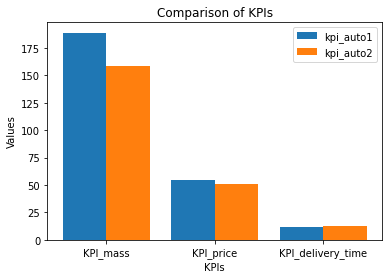

In [9]:
import matplotlib.pyplot as plt
import numpy as np

#Array Position setzen für Balkendiagramm

positions = np.arange(len(kpi_auto1))  

# Balkendiagramm erzeugen 

plt.bar(positions, kpi_auto1, width=0.4, label='kpi_auto1', align='center')
plt.bar(positions + 0.4, kpi_auto2, width=0.4, label='kpi_auto2', align='center')

# x-Achsen Positionen benennen
plt.xticks(positions + 0.2, ['KPI_mass', 'KPI_price', 'KPI_delivery_time'])

# Titel und Bezeichnungen für Achsen erzeugen
plt.title('Comparison of KPIs')
plt.xlabel('KPIs')
plt.ylabel('Values')

# Legende hinzufügen
plt.legend()

# Balkendiagramm anzeigen
plt.show()


Interpretieren Sie Ihre Ergebnisse. Vergleichen Sie die KPIs Ihrer Autos. Konnten Sie Ihre gewünschte Verbesserung erzielen? Welche Schlüsse ziehen Sie aus den Ergebnissen für die Qualität der beiden
Fahrzeuge?

Beim Auto 2 konnte die KPI für Masse und Preis im Gegensatz zu Auto 1 verbessert werden, jedoch hat sich sich die KPI der Lieferzeit minimal verschlechtert. Resultat: Es ist schwierig alle KPIs zu optimieren.

Diskutieren Sie, inwieweit Ihre entwickelten KPIs die im Skript erläuterten FAIR-Prinzipien erfüllen:

Meine KPIs sind durch die Speicherung in den Listen auffindbar und zugänglich, außerdem sind sie im json-Format abgespeichert und daher interoperabel verwendbar. Auch bei einer Änderung der Werte der json-Dateien können die KPIs wiederverwendet werden. Bauteile können beliebig hinzugefügt oder entfernt werden.

## Fazit

Ziehen Sie ein persönliches Fazit. Was haben Sie Neues gelernt?

KPIs sind ein wichtiges Instrument um die Qualität eines Produktes zu beurteilen. Außerdem habe ich einen Überblick über Phyton und die darin verwendeten Datenstrukturen erlangt.